# Simulación de un vector normal bivariado

**Observaciones**
- $X=(X_{1},X_{2})$ es normal bivariado si y sólo si $X_{1}$ y $X_{2}$ son variables aleatorias normales independientes.
- Basta tomar $X_{1}$ y $X_{2}$ con media $0$ y varianza $1$ (ya que una variable aleatoria normal admite momento de orden 2).
- Por independencia,
$$f_{(X_{1},X_{2})}(x_{1},x_{2})=f_{X_{1}}(x_{1})f_{X_{2}}(x_{2})=\frac{1}{\sqrt{2\pi}}e^{-\frac{x_{1}^{2}}{2}}\frac{1}{\sqrt{2\pi}}e^{-\frac{x_{2}^{2}}{2}}=\frac{1}{2\pi}e^{-\frac{1}{2}(x_{1}^{2}+x_{2}^{2})}.$$

Vamos a usar el teorema del **cambio de variable**. En particular, tomaremos la transformación de coordenadas rectangulares a coordenadas polares:
\begin{align}
T: \mathbb{R}^{2}&\to (0,\infty)\times [0,2\pi]\\
 (x_{1},x_{2})&\mapsto (r,\theta)
\end{align}
donde
- $r^{2}=x_{1}^{2}+x_{2}^{2}$,
- $\theta=\arctan(x_{2}/x_{1})$,
con inversa $x_{1}=r\cos(\theta)$ y $x_{2}=r\sin(\theta)$. El **jacobiano** de esta transformación es $r>0$.

Por lo tanto, si denotamos por $R=\sqrt{X_{1}^{2}+X_{2}^{2}}$ y $\Theta=\arctan(X_{2}/X_{1})$, la ley del vector $(R,\Theta)$ está dada por
$$f_{(R,\Theta)}(r,\theta)=\frac{1}{2\pi}re^{-\frac{1}{2}r^{2}}=f_{R^{2}}(r)f_{\Theta}(\theta).$$
Aquí, $\Theta\sim U[0,2\pi]$ y a $R$ es la variable aleatoria de Rayleygh. En particular, $R$ y $\Theta$ son independientes.

Sea $D=R^{2}$. Entonces,
$$f_{(D,\Theta)}(d,\theta)=\frac{1}{2\pi}\frac{1}{2}e^{-\frac{1}{2}d}.$$

De lo anterior, para generar un vector aleatorio normal bivariado estándar, es suficiente saber cómo generar una variable aleatoria uniforme en $(0,2\pi]$ y una variable aleatoria exponencial con parámetro $1/2$.

Sean $U_{1}$ y $U_{2}$ variables aleatorias uniformes independientes en $[0,1]$. Entonces,
- $\Theta:=2\pi U_{1}$.
- $D:=-2\log(U_{2})$. En efecto, para $x>0$
$$\mathbb{P}(D\leq x)=\mathbb{P}\left(\log(U_{2})\geq -\frac{1}{2}x\right)=\mathbb{P}(U_{2}\geq e^{-\frac{1}{2}x})=1-e^{-\frac{1}{2}x}.$$
Por lo tanto, $D\sim \exp(1/2)$.

**Teorema.** Para generar dos variables aleatorias $X_{1},X_{2}\sim N(0,1)$ independientes a partir de $U_{1}$ y $U_{2}$ variables aleatorias uniformes independientes sobre $[0,1]$, basta tomar 
- $X_{1}=R\cos(\Theta)$.
- $X_{2}=R\sin(\Theta)$.

Además, con esto construímos al vector $X=(X_{1},X_{2})$ normal bivariado.

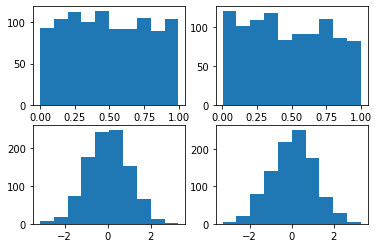

In [1]:
import numpy as np 
from numpy import random, sqrt, log, sin, cos, pi
import scipy.stats as stats
from pylab import show,hist,subplot,figure
import matplotlib.pyplot as plt


def gaussian(u1,u2):
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1,z2


u1 = random.rand(1000)
u2 = random.rand(1000)


z1,z2 = gaussian(u1,u2)


figure()
subplot(221) 
hist(u1)      
subplot(222)
hist(u2)
subplot(223) 
hist(z1)     
subplot(224)
hist(z2)
show()

## Normal bivariada

El siguiente resultado, nos da una forma de generar vectores aleatorios gaussianos.

**Teorema.** Sea $\mu\in \mathbb{R}^{n}$ y $\Sigma\in Mat_{n\times n}(\mathbb{R})$ una matriz simétrica y positiva definida. Entonces, existe un vector gaussiano $X=(X_{1},\dots, X_{n})$ tal que 
$$X\sim N(\mu, \Sigma).$$

In [2]:
def showBasis(ax,vecs,lim=(-2,2),color0=(1,0,0),color1=(0,1,0), origine=(0,0)):
    "attention: c'est les colonnes de vecs qui sont les 2 vecteurs tracés"
    vec0=vecs[:,0]
    vec1=vecs[:,1]
    
    ax.set_aspect("equal")

    ax.arrow(origine[0],origine[1],vec0[0],vec0[1], head_width=0.1, head_length=0.2,color=color0,zorder=10)
    ax.arrow(origine[0],origine[1],vec1[0],vec1[1], head_width=0.1, head_length=0.2,color=color1,zorder=10)
    
    
    ax.set_xlim(lim[0],lim[1])
    ax.set_ylim(lim[0],lim[1])

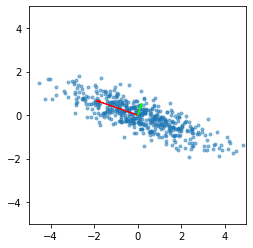

In [3]:
Sigma2 = np.array([[3,-1],[-1,0.5]])
mu = np.array([3,4])

X = np.random.multivariate_normal(mean=mu, cov=Sigma2, size=500).T
X_cen = X - mu.reshape((2,1))
                                                                
fig, ax = plt.subplots()

ax.plot(X_cen[0,:], X_cen[1,:], '.', alpha=0.5)

U,S2,V = np.linalg.svd(Sigma2)
S = np.sqrt(S2)
U_s = U.copy()
U_s[:,0] *= S[0]
U_s[:,1] *= S[1]

showBasis(ax,  U_s , lim=(-5,5))

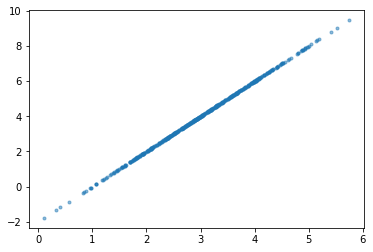

In [4]:
Sigma2 = np.array([[1,2],[2,4]])
mu = np.array([3,4])

X = np.random.multivariate_normal(mean=mu,cov=Sigma2,size=500).T
                                                                
fig, ax = plt.subplots()
ax.plot(X[0,:],X[1,:],'.', alpha=0.5);

In [5]:
def betaBeta(nbData):
    X0=np.random.beta(a=1,b=3,size=nbData)
    X1=np.random.beta(a=2,b=1,size=nbData)
    return np.stack([X0,X1],axis=0)

def densityX(x,y):
    return stats.beta.pdf(x,a=1,b=3)*stats.beta.pdf(y,a=2,b=1)

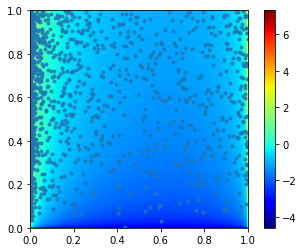

In [6]:
def betaBetaBis(nbData):
    X0=np.random.beta(a=0.1,b=0.5,size=nbData)
    X1=np.random.beta(a=1.5,b=1,size=nbData)
    return np.stack([X0,X1],axis=0)

def densityXBis(x,y):
    return np.minimum(stats.beta.pdf(x,a=0.1,b=0.5),1000)*stats.beta.pdf(y,a=1.5,b=1)

lim=1
xx=np.linspace(0, lim, 1000)
yy=np.linspace(0, lim, 1000)
XX,YY=np.meshgrid(xx,yy)

den_square=densityXBis(XX,YY)
log_den=np.log(den_square+1e-2)
X=betaBetaBis(2000)
plt.plot(X[0,:],X[1,:],'.',alpha=0.8)
plt.imshow(log_den,extent=[0,lim,0,lim],origin="lower",cmap="jet")
plt.colorbar();

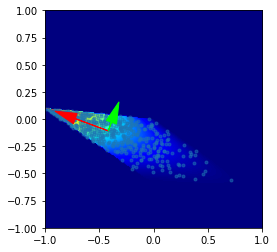

In [7]:
def deform_density(density, x, y,a):
    a_inv=np.linalg.inv(a)    
    xy=np.stack([x,y])
    axy=a_inv@xy
    ax=axy[0]
    ay=axy[1]
    return density(ax,ay)

X=betaBeta(500)
a=np.array([[1,-1],[-0.7,0.1]])
aX=a@X

lim=1
resolution=200
xx=np.linspace(-lim,lim,resolution)
XX,YY=np.meshgrid(xx,xx)
XY=np.stack([XX,YY])
XY_flat=np.reshape(XY,newshape=[2,resolution*resolution])
den_flat=deform_density(densityX, XY_flat[0], XY_flat[1], a)
den_square=np.reshape(den_flat,newshape=[resolution,resolution])

fig,ax=plt.subplots()
ax.imshow(den_square,cmap="jet",origin="lower",extent=[-lim,lim,-lim,lim])
ax.plot(aX[0,:],aX[1,:],'.',alpha=0.5)
ax.set_aspect('equal')

mu=(-5/12,-13/120)

cov=a@np.array([[3/80, 0],[0,1/18]])@a.T

U,S2,V=np.linalg.svd(cov)
S=np.sqrt(S2)
U_s=U.copy()
U_s[:,0]*=S[0]
U_s[:,1]*=S[1]

showBasis(ax,  U_s , lim=(-1,1), origine=mu)